# Refugee resettlement in the USA `13 points`

Source: https://www.refugeeresettlementdata.com/data.html

As described in [Data Is Plural](https://www.data-is-plural.com/archive/2021-07-14-edition/)

> Axel Dreher et al. have published person-level data on 2.5+ million refugees who arrived in the US between 1975 and 2008. The anonymized records, obtained from the National Archives and originally collected by the Office of Refugee Resettlement, indicate each refugee’s country and date of birth, marital and family status, education level and English proficiency, date of US arrival, US city of resettlement, and more. The researchers also combined these records with public reports from the Bureau of Population, Refugees, and Migration (DIP 2015.11.25) to create a geocoded dataset of annual resettlements by citizenship and destination city from 1975 to 2018.

### Topis covered

* Aggregating
* Filtering
* Unfriendly complexity in data
* Exploratory visualization
* FIPS codes
* Mapping

# Basic analysis `4 points`

### Read in your data

We'll be using the geocoded file, which comes as a `dta` file. A `.dta` file is technically an export from [STATA](https://www.stata.com/), which means you use `pd.read_stata` to bring it in – but otherwise it's the same as a CSV.

In [1]:
#IMPORT the libraries
import pandas as pd

In [2]:
#READ IN the data
df = pd.read_stata("orr_prm_1975_2018_v1.dta")

In [3]:
#OVERVIEW
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140503 entries, 0 to 140502
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   city_id             140503 non-null  float64 
 1   city_nat_id         140503 non-null  float32 
 2   city_nat_year_id    140503 non-null  float32 
 3   year                140503 non-null  int16   
 4   citizenship_stable  140503 non-null  object  
 5   refugees            140503 non-null  float32 
 6   city                140503 non-null  object  
 7   city_code           111762 non-null  float64 
 8   county_fips         140503 non-null  object  
 9   state_fips          140503 non-null  object  
 10  fips                140503 non-null  object  
 11  county10name        140503 non-null  object  
 12  countyfp10          140503 non-null  object  
 13  statefp10           140503 non-null  object  
 14  geo_level           140503 non-null  category
 15  longitude        

### What years does this dataset include?

In [4]:
#FIND unique values for 'year'
df.year.unique()

array([1983, 1984, 1987, 1988, 1999, 2001, 2003, 2004, 2005, 2008, 1975,
       1979, 1980, 1981, 1982, 1985, 1989, 2002, 1986, 1993, 1977, 1978,
       1991, 1992, 1996, 1990, 1994, 1995, 1997, 1998, 2000, 2006, 2007,
       2015, 2013, 2014, 1976, 2009, 2011, 2016, 2010, 2012, 2017, 2018],
      dtype=int16)

### According to this dataset, what are the top 5 countries for refugees resettled into the United States?

In [5]:
#COUNT by citizenship, SORT in descending order and SHOW first 5 values
df.citizenship_stable.value_counts().sort_values(ascending=False).head(5)

vietnam    32449
ussr       16270
iran        9596
laos        9193
iraq        7940
Name: citizenship_stable, dtype: int64

ANSWER: Vietnam, USSR, Iran, Laos and Iraq are the top 5 countries for refugees resettlied into the United States

### Why can't I use `.value_counts()` to tell me how many refugees came from each country?

ANSWER: because the column 'refugees' can contain information of more than 1 person per row

### What are the top 5 cities for resettling refugees?

In [6]:
df.city.value_counts().sort_values(ascending=False).head(5)

Portland     916
Chicago      756
Houston      751
Rochester    696
             677
Name: city, dtype: int64

### Surprise, you got tricked! You can't just use `city` to answer that question. Why?

It will help if you try to look at all of the rows for the city of Brooklyn.

In [7]:
df.loc[df['city'] == 'Brooklyn']

,city_id,city_nat_id,city_nat_year_id,year,citizenship_stable,refugees,city,city_code,county_fips,state_fips,fips,county10name,countyfp10,statefp10,geo_level,longitude,latitude,id_merging
56400,5139.0,16074.0,55809.0,1999,ethiopia,11.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45388.0
56401,5139.0,16074.0,55810.0,2000,ethiopia,4.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45389.0
56402,5139.0,16074.0,55811.0,2004,ethiopia,10.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45390.0
56403,5139.0,16075.0,55812.0,1983,laos,7.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45391.0
56404,5139.0,16075.0,55813.0,2005,laos,2.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137130,14857.0,44199.0,136177.0,1986,iran,1.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111229.0
137131,14857.0,44200.0,136178.0,1988,ussr,5.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111230.0
137132,14857.0,44201.0,136179.0,1978,vietnam,1.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111231.0
137133,14857.0,44201.0,136180.0,1980,vietnam,1.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111232.0


so there's more than one Brooklyn here, ok

### What is the correct answer for the top 5 cities for resettling refugees?

Spoiler: I recommend using both `city` *and* `city_id` every time you want to look at individual cities. Also: it might be the same answer, but the numbers will be a little different.

In [8]:
#GROUPBY 2 columns at a time and SORT by the number of times both are used 
df.groupby(["city", "city_id"]).size().reset_index(name="Time").sort_values(by="Time", ascending=False).head(5)

,city,city_id,Time
3885,Denver,2748.0,588
6626,Houston,4198.0,507
2881,Chicago,7094.0,500
10941,Phoenix,2367.0,459
3671,Dallas,3728.0,447


ANSWER: Denver, Houston, Chicago, Phoenix and Dallas are the top 5 cities for resettling refugees.

### Comparing cities

Pick 3 cities in the United States - one on the east coast, one on the west coast, and one somewhere in between. What are the top 10 countries for refugees for each? Be sure to use `city_id`.

In [9]:
#PICKING Boston and SHOWING the unique counties 
df.loc[df['city'] == 'Boston'].county10name.unique()

array(['Thurston', 'Hampden', 'Suffolk', 'Essex', 'Barnstable',
       'Nantucket'], dtype=object)

In [10]:
#ADDING 'Suffolk' and DISCOVERING there are still 8 city_ids here
Boston = df[(df['city'] == 'Boston')&(df['county10name'] == 'Suffolk')]
Boston.city_id.unique()

array([14655., 14818., 14854., 14906., 14909., 14910., 14938., 15008.])

In [11]:
#SORT them from the largest to smallest
Boston.city_id.value_counts().sort_values(ascending=False)

14938.0    289
14909.0    103
15008.0      3
14818.0      3
14906.0      1
14910.0      1
14854.0      1
14655.0      1
Name: city_id, dtype: int64

In [12]:
#SELECT the city_id with the largest n of values
Boston = df[(df['city_id'] == 14938)]

In [13]:
#CHECK the top 10 countries for refugees in Boston, Suffolk, 14938
Boston.citizenship_stable.value_counts().sort_values(ascending=False).head(10)

vietnam        30
ussr           26
ethiopia       20
somalia        16
afghanistan    13
iran           13
cambodia       13
sudan          12
iraq           12
yugoslavia     12
Name: citizenship_stable, dtype: int64

In [14]:
#PICKING Chicago city in Cook county and looking for the number of values for each city_id
Chicago = df[(df['city'] == 'Chicago')&(df['county10name'] == 'Cook')]
Chicago.city_id.unique()
Chicago.city_id.value_counts().sort_values(ascending=False)

7094.0    500
7108.0    231
7095.0      7
Name: city_id, dtype: int64

In [15]:
#SELECT the city_id with the largest n of values
Chicago = df[(df['city_id'] == 7094)]

In [16]:
#CHECK the top 10 countries for refugees in Chicago, Cook, 7094
Chicago.citizenship_stable.value_counts().sort_values(ascending=False).head(10)

vietnam        32
ussr           27
ethiopia       26
iraq           25
iran           25
cuba           23
afghanistan    20
somalia        19
laos           18
sudan          16
Name: citizenship_stable, dtype: int64

In [17]:
#PICKING LA in Cook county and looking for the number of values for each city_id
LA = df[(df['city'] == 'Los Angeles')&(df['county10name'] == 'Los Angeles')]
LA.city_id.unique()
LA.city_id.value_counts().sort_values(ascending=False)

1609.0    356
1613.0     86
Name: city_id, dtype: int64

In [18]:
#SELECT the city_id with the largest n of values
LA = df[(df['city_id'] == 1609)]

In [19]:
#CHECK the top 10 countries for refugees in LA, LOs Angekes, 1609
LA.citizenship_stable.value_counts().sort_values(ascending=False).head(10)

vietnam        31
ussr           28
iran           26
ethiopia       25
cuba           24
afghanistan    18
cambodia       16
iraq           16
laos           16
unknown        15
Name: citizenship_stable, dtype: int64

### Where were refugees from Afghanistan resettled before 2000 as compared to after 2000?

In [20]:
#FILTER for the country of origin and years before 2000, then sorting by city and city id
df_before = df[(df['citizenship_stable'] == 'afghanistan')&(df['year'] < 2000)]
df_before.groupby(["city", "city_id"]).size().reset_index(name="Time").sort_values(by="Time", ascending=False).head(5)

,city,city_id,Time
325,Hayward,820.0,16
16,Alameda,606.0,15
45,Atlanta,8168.0,15
252,Flushing,13615.0,15
645,San Diego,2046.0,15


In [21]:
#FILTER for the country of origin and years after 2000, then sorting by city and city id
df_after = df[(df['citizenship_stable'] == 'afghanistan')&(df['year'] > 2000)]
df_after.groupby(["city", "city_id"]).size().reset_index(name="Time").sort_values(by="Time", ascending=False).head(5)

,city,city_id,Time
97,Charlottesville,10789.0,17
146,Denver,2748.0,13
441,Sacramento,956.0,12
29,Atlanta,8161.0,10
56,Boise,2203.0,10


### Exploratory line charts `1 point`

**Using line charts,** examine 3 different countries' patterns of entry into the US over the years. What do their entry trends look like over time?

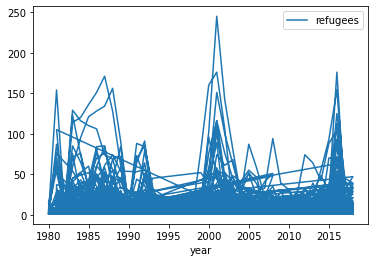

In [25]:
#Afghanistan
af = df.loc[df['citizenship_stable'] == 'afghanistan']
af.plot.line(x='year', y='refugees')

At first I was puzzled at this messy line chart, then I realized that each year had in fact many data entries and pandas is connecting them on a chart based on a city apparently. But still, we can see the general pattern. Three clear picks here: early 1980s, years just after 2000 and 2016 or so. I would link the first one with the Soviet-Afghan war, the second one to the 9/11 and the 'war on terror' and the thired one probably with the most recent so called migration crisis. 

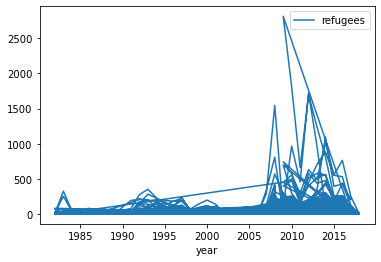

In [26]:
#Iraq
iraq = df.loc[df['citizenship_stable'] == 'iraq']
iraq.plot.line(x='year', y='refugees')

The official dates of the Iraq war are from 2003 to 2011, while the refugees only could escape cloes to the end of this period (2007 - 2011).

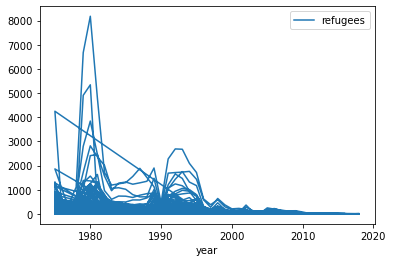

In [27]:
#Vietnam
vietnam = df.loc[df['citizenship_stable'] == 'vietnam']
vietnam.plot.line(x='year', y='refugees')

1980 was the year of the biggest intake of the refugees from Vietnam, I guess as a measure following the end of the war. The delay between the years of conflict and years of the refugees' intake looks interesting. Is it because of the bureaucracy and delayed migration policies' response?

### DataWrapper charts with annotations `2 points`

Using [DataWrapper](https://www.datawrapper.de/), make a line chart of one of the countries' refugees inflow over the years. **Use the annotation tool to note event(s) that caused an influx of refugees.**

Link the chart in the cell below.

https://www.datawrapper.de/_/o6XfP/

### What are the top seven states for refugee resettlement in the USA? `1 point`

Trying to use a CSV of FIPS codes and state names never works out well, I recommend doing cleaning that up manually.

In [30]:
df.state_fips.value_counts().sort_values(ascending=False).head(7)

06    21017
36     9965
48     7329
17     6329
12     6227
42     5995
25     5595
Name: state_fips, dtype: int64

Which gives us: California, New York, Texas, Illinois, Florida, Pennsylvania, Massachusetts

### Mapping refugees, level 1 `2 point`

Make a state-based choropleth of where refugees from a given country (your choice) have been resettled in the USA.

Use the tool of your choice: DataWrapper, MapShaper, or QGIS.

https://www.datawrapper.de/_/W46LD/

### Mapping refugees, level 2 `3 points`

Make an animated map or a grid of maps of where refugees from a given country have been resettled in the USA.

Use the tool of your choice: DataWrapper, MapShaper, or QGIS.

> **Tip:** Depending on the tool you use, you might want either long or wide data. Using `.reset_index()` will give you long data, `.unstack()` will give you wide data.

https://anastasiavaleeva.com/refugees_gif_map

I created this using datawrapper library for Python
The full code is in a dedeicated notebook 'Refugees_gif_map' in the same folder